# 225229147

# Lab 5. Diabetes Classification using Logistic Regression

In [1]:
#step 1 Importing the dataset

In [2]:
import pandas as pd

In [3]:
db=pd.read_csv("diabetes.csv")

In [4]:
db.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
db.shape

(768, 9)

In [6]:
db.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
db.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [8]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
db.value_counts

<bound method DataFrame.value_counts of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0

In [10]:
#step 2

In [11]:
X=db.drop('Outcome',axis=1)
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [12]:
y=db['Outcome']
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [13]:
from sklearn.model_selection import StratifiedShuffleSplit
sss=StratifiedShuffleSplit(n_splits=4,test_size=0.25,random_state=12)
sss.get_n_splits(X,y)

4

In [14]:
for train,test in sss.split(X,y):     
    X_train = X.loc[train]
    y_train = y.loc[train]
    X_test = X.loc[test]
    y_test = y.loc[test]

In [15]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
361,5,158,70,0,0,29.8,0.207,63
5,5,116,74,0,0,25.6,0.201,30
163,2,100,64,23,0,29.7,0.368,21
239,0,104,76,0,0,18.4,0.582,27
524,3,125,58,0,0,31.6,0.151,24
...,...,...,...,...,...,...,...,...
464,10,115,98,0,0,24.0,1.022,34
606,1,181,78,42,293,40.0,1.258,22
412,1,143,84,23,310,42.4,1.076,22
552,6,114,88,0,0,27.8,0.247,66


In [16]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
485,0,135,68,42,250,42.3,0.365,24
371,0,118,64,23,89,0.0,1.731,21
698,4,127,88,11,155,34.5,0.598,28
375,12,140,82,43,325,39.2,0.528,58
575,1,119,44,47,63,35.5,0.280,25
...,...,...,...,...,...,...,...,...
45,0,180,66,39,0,42.0,1.893,25
501,3,84,72,32,0,37.2,0.267,28
241,4,91,70,32,88,33.1,0.446,22
341,1,95,74,21,73,25.9,0.673,36


In [17]:
y_train

361    0
5      0
163    0
239    0
524    0
      ..
464    0
606    1
412    0
552    0
682    0
Name: Outcome, Length: 576, dtype: int64

In [18]:
y_test

485    1
371    0
698    0
375    1
575    0
      ..
45     1
501    0
241    0
341    0
656    0
Name: Outcome, Length: 192, dtype: int64

In [19]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression(penalty='l2')
LR.fit(X_train,y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
y_pred=LR.predict(X_test)
y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0], dtype=int64)

In [21]:
#Step3

In [22]:
new_pred=LR.predict([[6,200,90,10,25,23.3,0.672,42]])
if new_pred==0:
    print("Result: ",new_pred," ,The person is not diabetic",)
else:
    print("Result: ",new_pred," ,The person is diabetic")

Result:  [1]  ,The person is diabetic


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [23]:
#Step3

In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8072916666666666

In [25]:
from sklearn.metrics import precision_score
precision_score(y_test,y_pred)

0.8571428571428571

In [26]:
from sklearn.metrics import recall_score
recall_score(y_test,y_pred)

0.5373134328358209

In [27]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred)

0.7446567164179104

In [28]:
#Step4

In [29]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[119,   6],
       [ 31,  36]], dtype=int64)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

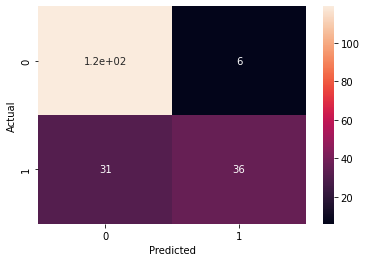

In [30]:
import numpy as np
import seaborn as sns
df_cm = pd.DataFrame(cm, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm,annot=True)


Predicted 0 Actual 0- Data is 0 , predicted value too 0. Truly Negative
Predicted 0 Actual 1- Data is 1 , predicted value is 0. Falsely Negative
Predicted 1 Actual 0- Data is 0 , predicted value is 1. Falsely Positive
Predicted 1 Actual 1- Data is 1 , predicted value too 1. Truly Positive

In [31]:
#Step5

In [32]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
mm_X_train=mm.fit_transform(X_train)
mm_X_train

array([[0.29411765, 0.7979798 , 0.57377049, ..., 0.44411326, 0.05730786,
        0.875     ],
       [0.29411765, 0.58585859, 0.60655738, ..., 0.38152012, 0.05464238,
        0.1875    ],
       [0.11764706, 0.50505051, 0.52459016, ..., 0.44262295, 0.12883163,
        0.        ],
       ...,
       [0.05882353, 0.72222222, 0.68852459, ..., 0.6318927 , 0.44335851,
        0.02083333],
       [0.35294118, 0.57575758, 0.72131148, ..., 0.414307  , 0.07507774,
        0.9375    ],
       [0.        , 0.47979798, 0.52459016, ..., 0.66467958, 0.12794314,
        0.02083333]])

In [33]:
mm_X_test=mm.transform(X_test)
mm_X_test

array([[0.        , 0.68181818, 0.55737705, ..., 0.63040238, 0.12749889,
        0.0625    ],
       [0.        , 0.5959596 , 0.52459016, ..., 0.        , 0.73434029,
        0.        ],
       [0.23529412, 0.64141414, 0.72131148, ..., 0.51415797, 0.23100844,
        0.14583333],
       ...,
       [0.23529412, 0.45959596, 0.57377049, ..., 0.49329359, 0.1634829 ,
        0.02083333],
       [0.05882353, 0.47979798, 0.60655738, ..., 0.38599106, 0.26432697,
        0.3125    ],
       [0.11764706, 0.51010101, 0.47540984, ..., 0.32488823, 0.03420702,
        0.02083333]])

In [34]:
LOR=LogisticRegression()

In [35]:
LOR.fit(mm_X_train,y_train)


LogisticRegression()

In [36]:
mm_y_pred=LOR.predict(mm_X_test)
mm_y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0], dtype=int64)

In [37]:
accuracy_score(y_test,mm_y_pred)

0.78125

In [38]:
precision_score(y_test,mm_y_pred)

0.8571428571428571

In [39]:
recall_score(y_test,mm_y_pred)

0.44776119402985076

In [40]:
mm_AUC=roc_auc_score(y_test,mm_y_pred)
mm_AUC

0.7038805970149253

In [41]:
#Step6

In [42]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss_X_train=ss.fit_transform(X_train)
ss_X_train

array([[ 0.27659012,  1.11936793,  0.04285701, ..., -0.2777852 ,
        -0.8185577 ,  2.49888967],
       [ 0.27659012, -0.16879442,  0.24900012, ..., -0.82374177,
        -0.83711808, -0.29993744],
       [-0.59240576, -0.65952294, -0.26635766, ..., -0.29078416,
        -0.32052094, -1.06325392],
       ...,
       [-0.88207105,  0.65930995,  0.7643579 , ...,  1.36008453,
         1.86960346, -0.97844098],
       [ 0.56625542, -0.23013549,  0.97050101, ..., -0.53776452,
        -0.69482186,  2.7533285 ],
       [-1.17173634, -0.8128756 , -0.26635766, ...,  1.64606178,
        -0.32670773, -0.97844098]])

In [43]:
ss_X_test=ss.transform(X_test)
ss_X_test

array([[-1.17173634,  0.41394569, -0.06021455, ...,  1.34708556,
        -0.32980113, -0.8088151 ],
       [-1.17173634, -0.10745336, -0.26635766, ..., -4.15147708,
         3.89577786, -1.06325392],
       [-0.01307517,  0.16858143,  0.97050101, ...,  0.33316621,
         0.39096015, -0.46956332],
       ...,
       [-0.01307517, -0.93555773,  0.04285701, ...,  0.15118068,
        -0.07923605, -0.97844098],
       [-0.88207105, -0.8128756 ,  0.24900012, ..., -0.78474487,
         0.62296485,  0.20894022],
       [-0.59240576, -0.62885241, -0.57557232, ..., -1.31770248,
        -0.9794143 , -0.97844098]])

In [44]:
LOR=LogisticRegression()
LOR.fit(ss_X_train,y_train)

LogisticRegression()

In [45]:
ss_y_pred=LOR.predict(ss_X_test)
ss_y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0], dtype=int64)

In [46]:
accuracy_score(y_test,ss_y_pred)

0.8020833333333334

In [47]:
precision_score(y_test,ss_y_pred)

0.8372093023255814

In [48]:
recall_score(y_test,ss_y_pred)

0.5373134328358209

In [49]:
ss_AUC=roc_auc_score(y_test,ss_y_pred)
ss_AUC

0.7406567164179104

In [50]:
#Step7

In [51]:
prob1=LOR.predict_proba(mm_X_test)

In [52]:
from sklearn.metrics import roc_curve
fpr1, tpr1, thresh1 = roc_curve(y_test, prob1[:,1], pos_label=1)

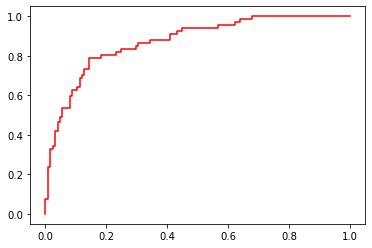

In [53]:
import matplotlib.pyplot as plt
plt.plot(fpr1,tpr1,linestyle='-',color='red',label='MinMaxScaler values')

In [54]:
#Step8

In [55]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_train,y_train)

KNeighborsClassifier()

In [56]:
KNNy_pred=KNN.predict(X_test)
KNNy_pred

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0], dtype=int64)

In [58]:
from sklearn.preprocessing import MinMaxScaler
MM=MinMaxScaler()
MM_X_train=MM.fit_transform(X_train)
MM_X_train

array([[0.29411765, 0.7979798 , 0.57377049, ..., 0.44411326, 0.05730786,
        0.875     ],
       [0.29411765, 0.58585859, 0.60655738, ..., 0.38152012, 0.05464238,
        0.1875    ],
       [0.11764706, 0.50505051, 0.52459016, ..., 0.44262295, 0.12883163,
        0.        ],
       ...,
       [0.05882353, 0.72222222, 0.68852459, ..., 0.6318927 , 0.44335851,
        0.02083333],
       [0.35294118, 0.57575758, 0.72131148, ..., 0.414307  , 0.07507774,
        0.9375    ],
       [0.        , 0.47979798, 0.52459016, ..., 0.66467958, 0.12794314,
        0.02083333]])

In [60]:
MM_X_test=MM.transform(X_test)
MM_X_test

array([[0.        , 0.68181818, 0.55737705, ..., 0.63040238, 0.12749889,
        0.0625    ],
       [0.        , 0.5959596 , 0.52459016, ..., 0.        , 0.73434029,
        0.        ],
       [0.23529412, 0.64141414, 0.72131148, ..., 0.51415797, 0.23100844,
        0.14583333],
       ...,
       [0.23529412, 0.45959596, 0.57377049, ..., 0.49329359, 0.1634829 ,
        0.02083333],
       [0.05882353, 0.47979798, 0.60655738, ..., 0.38599106, 0.26432697,
        0.3125    ],
       [0.11764706, 0.51010101, 0.47540984, ..., 0.32488823, 0.03420702,
        0.02083333]])

In [62]:
KNN=KNeighborsClassifier()
KNN.fit(MM_X_train,y_train)

KNeighborsClassifier()

In [63]:
MM_y_pred=KNN.predict(MM_X_test)
MM_y_pred

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0], dtype=int64)

In [64]:
accuracy_score(y_test,MM_y_pred)

0.7604166666666666

In [65]:
precision_score(y_test,MM_y_pred)

0.6981132075471698

In [66]:
recall_score(y_test,MM_y_pred)

0.5522388059701493

In [67]:
KNN_AUC=roc_auc_score(y_test,MM_y_pred)
KNN_AUC

0.7121194029850747

In [68]:
#Step9

In [69]:
prob2=KNN.predict_proba(MM_X_test)

In [70]:
from sklearn.metrics import roc_curve
fpr2,tpr2,thresh2=roc_curve(y_test,prob2[:,1],pos_label=1)

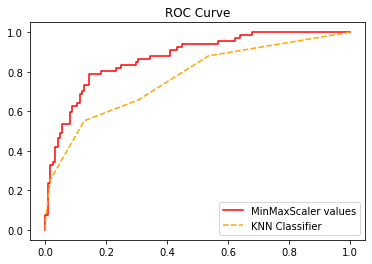

In [71]:
import matplotlib.pyplot as plt
plt.plot(fpr1,tpr1,linestyle='-',color='red',label='MinMaxScaler values')
plt.plot(fpr2,tpr2,linestyle='--',color='orange',label='KNN Classifier')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()

In [72]:
#Step10

In [73]:
from sklearn.linear_model import LogisticRegressionCV
model1=LogisticRegressionCV(Cs=10,cv=4,penalty='l1',solver='liblinear')
model2=LogisticRegressionCV(Cs=10,cv=4,penalty='l2')

In [74]:
model1.fit(mm_X_train,y_train)
model2.fit(mm_X_train,y_train)

LogisticRegressionCV(cv=4)

In [75]:
rg_y_pred1 = model1.predict(mm_X_test)
rg_y_pred2 = model2.predict(mm_X_test)

In [79]:
from sklearn.metrics import roc_auc_score
l1_AUC = roc_auc_score(y_test, rg_y_pred1)
l1_AUC = (' LOR L1 MINMAX AUC', l1_AUC)
l1_AUC

(' LOR L1 MINMAX AUC', 0.7406567164179104)

In [80]:
from sklearn.metrics import roc_auc_score
l2_AUC = roc_auc_score(y_test, rg_y_pred2)
l2_AUC = (' LOR L2 MINMAX AUC', l2_AUC)
l2_AUC

(' LOR L2 MINMAX AUC', 0.7406567164179104)

In [81]:
#Step11

In [84]:
prob3 = model1.predict_proba(mm_X_test)
prob4 = model2.predict_proba(mm_X_test)
fpr,tbr,threshold = roc_curve(y_test, prob1[:,1],pos_label=1)
fpr1,tbr1,threshold1 = roc_curve(y_test, prob2[:,1],pos_label=1)
fpr2,tbr2,threshold2= roc_curve(y_test, prob3[:,1],pos_label=1)
fpr3,tbr3,threshold3 = roc_curve(y_test, prob4[:,1],pos_label=1)

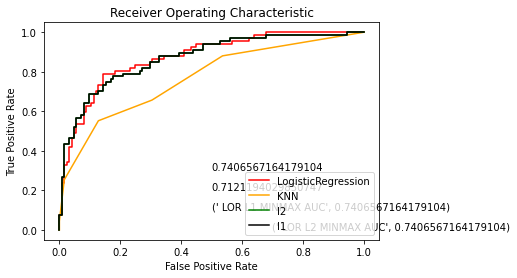

In [87]:
plt.plot(fpr, tbr, linestyle='-', color='Red', label='LogisticRegression')
plt.plot(fpr1, tbr1, linestyle='-', color='orange', label='KNN')
plt.plot(fpr3, tbr3, linestyle='-', color='green', label='l2')
plt.plot(fpr2, tbr2, linestyle='-', color='black', label='l1')
plt.annotate(xy=[0.5,0.3],text= ss_AUC)
plt.annotate(xy=[0.5,0.2],text= KNN_AUC)
plt.annotate(xy=[0.5,0.1],text= l1_AUC)
plt.annotate(xy=[0.7,0],text= l2_AUC)
plt.title('Receiver Operating Characteristic')
plt.legend(loc = 'best')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Since the area under the curve is less in KNN Model, That model is best suited for the given dataset